<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Summary-of-Findings" data-toc-modified-id="Summary-of-Findings-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Summary of Findings</a></span></li><li><span><a href="#Limitations" data-toc-modified-id="Limitations-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Limitations</a></span></li></ul></li><li><span><a href="#Summary-Stats" data-toc-modified-id="Summary-Stats-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Summary Stats</a></span></li><li><span><a href="#Missing-Data-and-Outliers" data-toc-modified-id="Missing-Data-and-Outliers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Missing Data and Outliers</a></span></li><li><span><a href="#Relationships" data-toc-modified-id="Relationships-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Relationships</a></span><ul class="toc-item"><li><span><a href="#Correlations" data-toc-modified-id="Correlations-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Correlations</a></span><ul class="toc-item"><li><span><a href="#Key-Performance-Indicators" data-toc-modified-id="Key-Performance-Indicators-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Key Performance Indicators</a></span></li><li><span><a href="#Diseases" data-toc-modified-id="Diseases-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Diseases</a></span><ul class="toc-item"><li><span><a href="#Malaria:-We-probably-do-malaria-the-best-of-all-the-services-we-provide.-" data-toc-modified-id="Malaria:-We-probably-do-malaria-the-best-of-all-the-services-we-provide.--4.1.2.1"><span class="toc-item-num">4.1.2.1&nbsp;&nbsp;</span><strong>Malaria: We probably do malaria the best of all the services we provide. </strong></a></span></li><li><span><a href="#-Pneumonia-&amp;-Diarrhoea-could-potentially-benefit-from-more-at-home/CHP-care-or-preventative-HH-practices" data-toc-modified-id="-Pneumonia-&amp;-Diarrhoea-could-potentially-benefit-from-more-at-home/CHP-care-or-preventative-HH-practices-4.1.2.2"><span class="toc-item-num">4.1.2.2&nbsp;&nbsp;</span><strong> Pneumonia &amp; Diarrhoea could potentially benefit from more at-home/CHP care or preventative HH practices</strong></a></span></li><li><span><a href="#-Childcare-is-potentially-mainly-directed-at-U1s-From-the-third-table" data-toc-modified-id="-Childcare-is-potentially-mainly-directed-at-U1s-From-the-third-table-4.1.2.3"><span class="toc-item-num">4.1.2.3&nbsp;&nbsp;</span><strong> Childcare is potentially mainly directed at U1s</strong> From the third table</a></span></li></ul></li></ul></li><li><span><a href="#Exploring" data-toc-modified-id="Exploring-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Exploring</a></span><ul class="toc-item"><li><span><a href="#By-Sales-Levels" data-toc-modified-id="By-Sales-Levels-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>By Sales Levels</a></span><ul class="toc-item"><li><span><a href="#-Sales-Level-3,500---10,000" data-toc-modified-id="-Sales-Level-3,500---10,000-4.2.1.1"><span class="toc-item-num">4.2.1.1&nbsp;&nbsp;</span><strong> Sales Level 3,500 - 10,000</strong></a></span></li><li><span><a href="#-Sales-Level-Above-10,000-Note,-n=3-here,-too-small." data-toc-modified-id="-Sales-Level-Above-10,000-Note,-n=3-here,-too-small.-4.2.1.2"><span class="toc-item-num">4.2.1.2&nbsp;&nbsp;</span><strong> Sales Level Above 10,000</strong> Note, n=3 here, too small.</a></span></li></ul></li><li><span><a href="#By-HH-Quintiles" data-toc-modified-id="By-HH-Quintiles-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>By HH Quintiles</a></span></li></ul></li></ul></li></ul></div>

# Introduction

Getting to understand the KE operations


## Summary of Findings


In [1]:
## Setup
# load libs/modules
%run "../utils/load_envz.ipynb"

In [2]:
# Load data set 
DATA_DIR = "../dataset"
DATA_FILE = "all_KE_CHVs_data_1493.csv" 
dataset = pd.read_csv( "%s/%s" % (DATA_DIR, DATA_FILE) )

In [3]:
## themes | variable - outcome mapping
argz_Units = ["CHP ID", "Households Registered"] 
argz_Ops = [ "Sales", "Community Events"]
argz_pregoz = [ "Pregnancy", "PNC Visit Rate", "PNC Visit Missed - #"]
argz_U5_care = ["Total U5 Assessments", "Total U5 Treatments"]
argz_U1_care = ["Total U1 Assessments", "Total U1 Treatments"]
argz_malaria = [ "All Malaria Assessments", "All Malaria Treatments", "Act 6pack Issue", "mRDT Used", "%mRDT"]
argz_U5_diseases = ["U5 Malaria", "U5 Diarrhea", "U5 Pneumonia"]

argz_EPMs = ["Households Registered", "Sales", "Community Events", "Total U5 Assessments", "Total U1 Assessments", "Pregnancy"]

## Additional Columns
dataset["Country"] = "KE"
#dataset["HHQuintiles"] = pd.qcut( dataset["Households Registered"], 5, labels=["HH_Quint_1", "HH_Quint_2", "HH_Quint_3", "HH_Quint_4", "HH_Quint_5"])
dnul = pd.Series( ["Households Registered"]).apply( lambda x: quintilize(dataset, x, labelzPrefix="HH_Quints" ) )
dataset["Class_Sales_Levels"] = np.where( dataset["Sales"] < 3500 , "Below_3500", np.where(dataset["Sales"] < 10000, "3500_to_10K", "Above_10K") ) 


## Limitations
- Doesn't recognize geographic differeces b/c no branch and district mapping in place to help explore that 

# Summary Stats

**Reach**: 
    - Number of CHPs, 
    - Number of Households, 
    - Average Households per CHP
    
**Impact??**  
    - Number of Assessments - U5, U1, Malaria 
    



In [4]:
# Sample structure 
sampleStructure(dataset, "Country") 
#dataset[ dataset["Households Registered"] < dataset["Households Registered"].mean() ]["Households Registered"].count()

CHP ID Households Registered                  Sales                \
        # CHPs                 # HHs Avg.CHP.Size KES Sales Avg.CHP.Sales   
Country                                                                     
KE        1493                147956         99.0  460456.0         308.0   

             Pregnancy                      Community Events                 \
        # Pregoz Cases Avg.CHP.pregoz.cases         # Events Avg.CHP.Events   
Country                                                                       
KE                 408                  0.0              384            0.0   

        All Malaria Assessments                       Total U5 Assessments  \
                # Malaria Cases Avg.CHP.malaria.cases        # Child Cases   
Country                                                                      
KE                         2986                     2                 5393   

                         Total U1 Assessments                   
        Avg.CHP.U5.cases           # U1 Cases Avg.CHP.U1.cases  
Country                                                         
KE                   4.0                 1216              1.0

In [5]:
summarizer(dataset)

,Pregnancy,PNC Visit Rate,PNC Visit Missed - #,Total U1 Assessments,Total U1 Treatments,Total U5 Assessments,Total U5 Treatments,U5 Malaria,U5 Diarrhea,U5 Pneumonia,On Time Referral f/u Treatment U5,Missed Visits,%mRDT,All Malaria Assessments,All Malaria Treatments,Act 6pack Issue,mRDT Used,Sales,Community Events,Households Registered
count,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00,1493.00
mean,0.27,0.13,0.15,0.81,0.33,3.61,1.70,1.00,0.33,0.36,0.16,0.15,0.40,2.00,1.36,2.70,2.00,308.41,0.26,99.10
std,0.62,0.33,0.40,1.31,0.80,4.41,2.82,2.16,0.81,0.94,0.36,0.56,0.47,3.84,3.15,7.02,3.84,1062.05,0.69,48.42
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,75.00
50%,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00
75%,0.00,0.00,0.00,1.00,0.00,6.00,2.00,1.00,0.00,0.00,0.00,0.00,1.00,3.00,1.00,2.00,3.00,146.56,0.00,125.00
max,4.00,1.00,3.00,9.00,6.00,25.00,23.00,18.00,10.00,10.00,1.00,7.00,1.00,41.00,38.00,99.00,41.00,18032.34,7.00,356.00


# Missing Data and Outliers 

The below graph shows the distribution of households registered. 

- All other activities are pegged on household registration 

- There are outliers; CHVS with households greater than 250 or less than 50. 
    - The less than 50 may be b/c of ongoingin (new) expansion activities. 
    - The more than 250 b/c ???


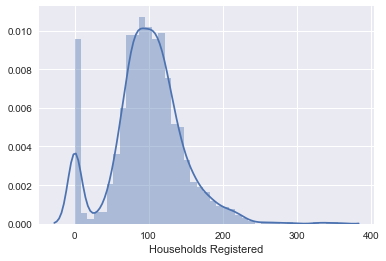

In [6]:
# outlier based on distribution of household registration 
sns.distplot( dataset["Households Registered"])

# Relationships

For this section, outliers have been removed; the analysis does not include outliers.
- Below is the distribution plot of households registered without out liers.
- Also, a table with the sample structure 

Note: Correlation coefficients whose magnitude are 
- between 0.9 and 1.0 indicate variables which can be considered very highly correlated. 
- between 0.7 and 0.9 indicate variables which can be considered highly correlated. 
- between 0.5 and 0.7 indicate variables which can be considered moderately correlated. 
- between 0.3 and 0.5 indicate variables which have a low correlation. 
- less than 0.3 have little if any (linear) correlation. 

- As the homogeneity of a group increases, the variance decreases and the magnitude of the correlation coefficient tends toward zero. It critical to have heterogeneity (variation) so that a relationship can manifest itself. 
    - In general, the correlation coefficient is not affected by the size of the group.

CHP ID Households Registered                  Sales                \
        # CHPs                 # HHs Avg.CHP.Size KES Sales Avg.CHP.Sales   
Country                                                                     
KE        1353                145693        108.0  456714.0         338.0   

             Pregnancy                      Community Events                 \
        # Pregoz Cases Avg.CHP.pregoz.cases         # Events Avg.CHP.Events   
Country                                                                       
KE                 406                  0.0              381            0.0   

        All Malaria Assessments                       Total U5 Assessments  \
                # Malaria Cases Avg.CHP.malaria.cases        # Child Cases   
Country                                                                      
KE                         2888                   2.0                 5332   

                         Total U1 Assessments                   
        Avg.CHP.U5.cases           # U1 Cases Avg.CHP.U1.cases  
Country                                                         
KE                   4.0                 1201              1.0

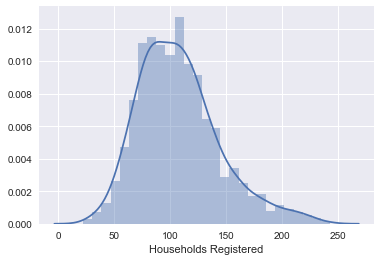

In [7]:
## Remove outliers
# updating dataset to HH > 20 and < 250 
dt_outliers = dataset[ (dataset["Households Registered"] < 20) | (dataset["Households Registered"] > 250) ]
dataset.drop( dt_outliers.index, inplace=True) #<< TODO: go back to boolean indexing


sns.distplot( dataset["Households Registered"]) 
sampleStructure(dataset, "Country") 


## Correlations

### Key Performance Indicators

Relating household registration, sales activities and key assessment activities. Note that correlations below 0.3 may be indicative of nothing

- **Community events relate more with child assessments than with sales.** 
    - An expectation is that community events are opportunities for driving sales. 
    - Sales has highest correlation with community events but community events is more correlated with child assessment than with sales. The correlation with sale is 0.13 compared to 0.3 with U5 assessments. 


- ** We potentially rarely discover new families or households outside of those we already service in some way. **  
    - New pregnancies are discovered within already known households whose children are attended to OR  new children cases are mainly within households where pregnancies are discovered. 
    - Household registration happen around pregnancy registrations OR pregnancy registrations happen around household registration. 




**The values **

- Correlations of 0.3 or more magnitude
    - U1 assessments are part of U5 assessments. Therefore, that association is expected. 
    - Community events have the highest association with U5 assessments. 
    

- Correlations of 0.2 to 0.3 magnitude 
    - Pregnancy has highest association with U1 (and U5) assessments


- Correlations of less than 0.2 magnitude
    - Household registration has highest association with Pregnancy
    - Sales has highest association with community events. 
    

,Households Registered,Sales,Community Events,Total U5 Assessments,Total U1 Assessments,Pregnancy
Households Registered,1.000,0.096,0.030,0.060,0.094,0.144
Sales,0.096,1.000,0.135,0.080,0.088,0.110
Community Events,0.030,0.135,1.000,0.300,0.250,0.087
Total U5 Assessments,0.060,0.080,0.300,1.000,0.757,0.241
Total U1 Assessments,0.094,0.088,0.250,0.757,1.000,0.243
Pregnancy,0.144,0.110,0.087,0.241,0.243,1.000


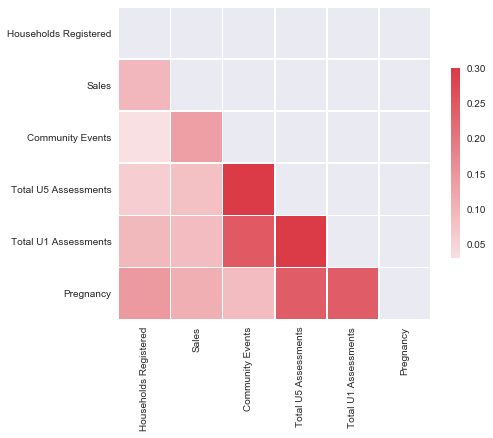

In [8]:
#plotCorrz( corrz(dataset, argz_EPMs) )
cout = corrz(dataset, argz_EPMs)
cout
plotCorrz( cout )

### Diseases 

#### **Malaria: We probably do malaria the best of all the services we provide. **
- Malaria variables have the strongest correlations in the dataset
   - The first table shows correlations within malaria activities. 
   - the are high magnitude values, close to 1  
       
- Association between ACT 6 pack and mRDT use suggest consistency of service delivery 
   - This can be seen in first table below. The magnitudes are high - strong associations, near 1 
       
- Potentially, we treat most of the malaria cases that are assessed instead of say referrering 
   - From the third table, referral f/u has lowest correlation with malaria compared to the other diseases.
       
- ** Malaria is potentially the largest service** we provide OR record (digitize) well so far. 
    - Child care (U5 assessments and treatment) is most correlated with malaria disease. This is seen in the third table below. 
      
       
- **So, should we 
    1). Open it to non-iCCM/eMNCH cases?**
            - Expand service to all members of a household? 
    **2). Monetize it or subsidize it? **
             - There's pontentially reasonable and ready demand. We could follow market pricing on this one; subsidize in regions where it is subsidized and sell at market rates where it is not. 
        
        




#### ** Pneumonia & Diarrhoea could potentially benefit from more at-home/CHP care or preventative HH practices** 
- Referral follow-up is most correlated with pneumonia. The magnitude is not large (0.3) but potentially indicative. 
    - pneumonia cases may be more driven by U1 care. 
    - What other records do we keep

- Of the diseases, pneumonia and diarrhoea have the highest association. The magnitude is not large (0.3), though.  
    - Curious??? Diarrhoea is about hygine and at-home best practices. 
    - Looking at the two, pneumonia seems to be driven more by U1 cases and diarrhoea by the other ages. 
    - Could it be that these need **more support via HH practices?** We potentially need more HH training and tools for preventative care? 
    
    
- Pneumonia may be getting the most follow-up activity

- So, could we do more for pneumonia?
    - Do we need to; what's the demand? 
    - What could we do via CHV? 
    



    
#### ** Childcare is potentially mainly directed at U1s** From the third table
- Is it a function of the demographics and disease incidences? TBD: more from national databases. 
- Could it relate to earlier observation on pregnancies and child assessments? **Are we inadvertently not targeting all potential children and households we could** by attending to children from pregnancies we've register or to pregnancies/deliveries within existing children? 

- Are other children U5 about **other cases that we don't attend to, may be?** 
    - Correlation between U5 assessments and treatment is 0.7 and between U5 assessments and referral f/u is 0.4. 
    - There's good association.
    - Looking at the malaria correlations, I wonder if these could also be stronger. And if so, why not? 
    
    


In [9]:
## Malaria  
cout1 = corrz(dataset, argz_malaria  )
cout1

,All Malaria Assessments,All Malaria Treatments,Act 6pack Issue,mRDT Used,%mRDT
All Malaria Assessments,1.000,0.933,0.883,1.000,0.610
All Malaria Treatments,0.933,1.000,0.950,0.933,0.517
Act 6pack Issue,0.883,0.950,1.000,0.883,0.459
mRDT Used,1.000,0.933,0.883,1.000,0.610
%mRDT,0.610,0.517,0.459,0.610,1.000


In [10]:
## All U5 Diseases
## Diseases 
cout2 = corrz(dataset, argz_U5_diseases+["Total U5 Assessments", "On Time Referral f/u Treatment U5", "Total U1 Assessments"])
cout2

,U5 Malaria,U5 Diarrhea,U5 Pneumonia,Total U5 Assessments,On Time Referral f/u Treatment U5,Total U1 Assessments
U5 Malaria,1.000,0.172,0.155,0.583,0.189,0.405
U5 Diarrhea,0.172,1.000,0.273,0.371,0.220,0.289
U5 Pneumonia,0.155,0.273,1.000,0.362,0.289,0.317
Total U5 Assessments,0.583,0.371,0.362,1.000,0.375,0.757
On Time Referral f/u Treatment U5,0.189,0.220,0.289,0.375,1.000,0.423
Total U1 Assessments,0.405,0.289,0.317,0.757,0.423,1.000


In [11]:
#fig, ax = plt.subplots( figsize=(10,10))
#plotCorrz( cout1 )
#plotCorrz( cout2 ) 

,U5 Malaria,U5 Diarrhea,U5 Pneumonia,Total U5 Assessments,Total U5 Treatments,Total U1 Assessments,Total U1 Treatments
U5 Malaria,1.000,0.172,0.155,0.583,0.866,0.405,0.554
U5 Diarrhea,0.172,1.000,0.273,0.371,0.520,0.289,0.404
U5 Pneumonia,0.155,0.273,1.000,0.362,0.543,0.317,0.401
Total U5 Assessments,0.583,0.371,0.362,1.000,0.678,0.757,0.452
Total U5 Treatments,0.866,0.520,0.543,0.678,1.000,0.503,0.679
Total U1 Assessments,0.405,0.289,0.317,0.757,0.503,1.000,0.588
Total U1 Treatments,0.554,0.404,0.401,0.452,0.679,0.588,1.000


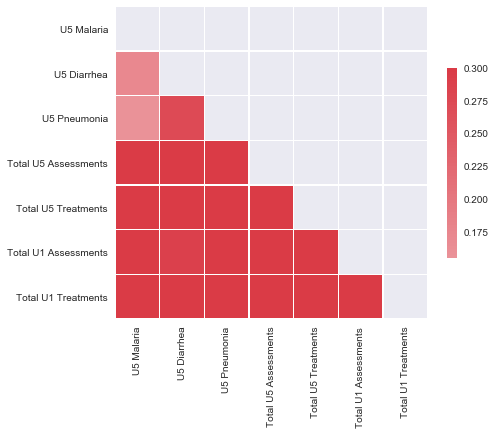

In [12]:
## All U5 Diseases
## Diseases 
cout3 = corrz(dataset, argz_U5_diseases+argz_U5_care+argz_U1_care)
cout3 
plotCorrz( cout3 )


## Exploring 




### By Sales Levels

- A big proportion, 98%, are below the 3500 sales target.

    - Previous observations, therefore, relate to this group
    
    - sample sizes are small for comparisons within the other two groups of (3500-10K and above 10K sales). n < 30 so using Spearman method

#### ** Sales Level 3,500 - 10,000**
- They have a higher average HHs per CHP (133). 
    - They do both sales and household registration well and have similar averages for health as the other groups. 
    - Could it be that it is possible to achieve both sales and health targets? 
        - What are they doing different?
        - how to transfer that to other CHPs? 
        - Potentially also use their averages as KPI benchmarks? 
        
- However, Sales is inversely correlated with household registration, pregnancy and U5 assessmet within this group. But, Community events is most correlated with Sales for this group followed by U1 assessments. 
    - Curious!!
    - **This group may be using community events to drive sales; they are potentially not chasing sales door-to-door during household registration and U5 health care delivery.** 
    - Wonder why U1 assessments could be associated with higher sales. Is it type of medication or are they discovering new households?? What?? 


#### ** Sales Level Above 10,000** Note, n=3 here, too small.
 - n = 3, likely outliers w/r/t sales levels. 
 - Avgerage CHP households registered are just about the country average (98 Vs 99). 
     - are they reaching/discovering new households but potentially not registering them b/c sales focus OR potentially targeting higher income level households?
         - Probably unlikely they could be pitching high volumes to the same households. 
         - May be they pitch high ticket products well. But then again a question of the income level of the households they are selling to and or how they are handling credit and/or payment for those large ticket items?
         - They average 14,358 sales.

In [13]:

sampleStructure(dataset, "Class_Sales_Levels") 


CHP ID Households Registered                  Sales  \
                   # CHPs                 # HHs Avg.CHP.Size KES Sales   
Class_Sales_Levels                                                       
3500_to_10K            18                  2395        133.0  106766.0   
Above_10K               3                   295         98.0   43073.0   
Below_3500           1332                143003        107.0  306875.0   

                                      Pregnancy                       \
                   Avg.CHP.Sales # Pregoz Cases Avg.CHP.pregoz.cases   
Class_Sales_Levels                                                     
3500_to_10K               5931.0             14                  1.0   
Above_10K                14358.0              1                  0.0   
Below_3500                 230.0            391                  0.0   

                   Community Events                All Malaria Assessments  \
                           # Events Avg.CHP.Events         # Malaria Cases   
Class_Sales_Levels                                                           
3500_to_10K                       8            0.0                      32   
Above_10K                         4            1.0                       5   
Below_3500                      369            0.0                    2851   

                                         Total U5 Assessments  \
                   Avg.CHP.malaria.cases        # Child Cases   
Class_Sales_Levels                                              
3500_to_10K                          2.0                   93   
Above_10K                            2.0                   14   
Below_3500                           2.0                 5225   

                                    Total U1 Assessments                   
                   Avg.CHP.U5.cases           # U1 Cases Avg.CHP.U1.cases  
Class_Sales_Levels                                                         
3500_to_10K                     5.0                   20              1.0  
Above_10K                       5.0                    4              1.0  
Below_3500                      4.0                 1177              1.0

In [14]:

## TODO: lambda and crosstab
#pd.Series( dataset["Class_Sales_Levels"]).apply( lambda x: plotCorrz( corrz(dataset[ dataset["Class_Sales_Levels"] == x], argz_EPMs) )   )

print( "1. Sales Levels Below 3500") 
corrz(dataset[ dataset["Class_Sales_Levels"] == "Below_3500"], argz_EPMs, "spearman") 
print( "2. Sales Levels Between 3,500 and 10,000") 
corrz(dataset[ dataset["Class_Sales_Levels"] == "3500_to_10K"], argz_EPMs, "spearman") 
print( "3. Sales Levels Above 10,000") 
corrz(dataset[ dataset["Class_Sales_Levels"] == "Above_10K"], argz_EPMs, "spearman") 

1. Sales Levels Below 3500


,Households Registered,Sales,Community Events,Total U5 Assessments,Total U1 Assessments,Pregnancy
Households Registered,1.000,0.127,0.032,0.075,0.089,0.147
Sales,0.127,1.000,0.205,0.194,0.181,0.115
Community Events,0.032,0.205,1.000,0.351,0.280,0.135
Total U5 Assessments,0.075,0.194,0.351,1.000,0.775,0.311
Total U1 Assessments,0.089,0.181,0.280,0.775,1.000,0.272
Pregnancy,0.147,0.115,0.135,0.311,0.272,1.000


2. Sales Levels Between 3,500 and 10,000


,Households Registered,Sales,Community Events,Total U5 Assessments,Total U1 Assessments,Pregnancy
Households Registered,1.000,-0.218,0.253,0.342,0.062,0.026
Sales,-0.218,1.000,0.308,-0.083,0.279,-0.176
Community Events,0.253,0.308,1.000,0.296,0.230,0.200
Total U5 Assessments,0.342,-0.083,0.296,1.000,0.675,0.497
Total U1 Assessments,0.062,0.279,0.230,0.675,1.000,0.456
Pregnancy,0.026,-0.176,0.200,0.497,0.456,1.000


3. Sales Levels Above 10,000


,Households Registered,Sales,Community Events,Total U5 Assessments,Total U1 Assessments,Pregnancy
Households Registered,1.000,1.000,0.866,0.500,0.866,0.000
Sales,1.000,1.000,0.866,0.500,0.866,0.000
Community Events,0.866,0.866,1.000,0.866,1.000,0.500
Total U5 Assessments,0.500,0.500,0.866,1.000,0.866,0.866
Total U1 Assessments,0.866,0.866,1.000,0.866,1.000,0.500
Pregnancy,0.000,0.000,0.500,0.866,0.500,1.000


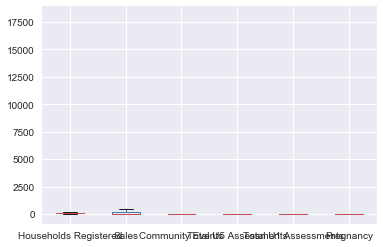

In [15]:
dataset[argz_EPMs].boxplot()

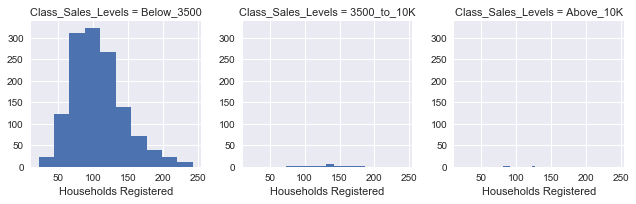

In [16]:
g = sns.FacetGrid(dataset, col="Class_Sales_Levels")
g.map(plt.hist, "Households Registered")

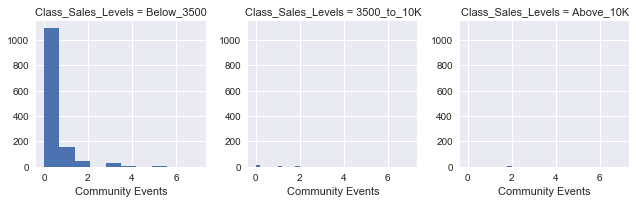

In [17]:
g = sns.FacetGrid(dataset, col="Class_Sales_Levels")
g.map(plt.hist, "Community Events")

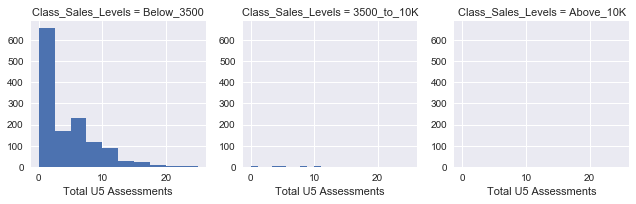

In [18]:
g = sns.FacetGrid(dataset, col="Class_Sales_Levels")
g.map(plt.hist, "Total U5 Assessments")

 ### By HH Quintiles 

In [19]:
#pd.Series( dataset["Quints_Households Registered"]).apply( 
#    lambda x: corrz( dataset[ (dataset["Quints_Households Registered"] == x) ], argz_U5_diseases+argz_U5_care+argz_U1_care)
#)

sampleStructure(dataset, "Quints_Households Registered") 

CHP ID Households Registered               \
                             # CHPs                 # HHs Avg.CHP.Size   
Quints_Households Registered                                             
HH_Quints_1                     169                  9610         57.0   
HH_Quints_2                     305                 24417         80.0   
HH_Quints_3                     300                 29990        100.0   
HH_Quints_4                     288                 34575        120.0   
HH_Quints_5                     291                 47101        162.0   

                                 Sales                    Pregnancy  \
                             KES Sales Avg.CHP.Sales # Pregoz Cases   
Quints_Households Registered                                          
HH_Quints_1                    25737.0         152.0             19   
HH_Quints_2                    82482.0         270.0             84   
HH_Quints_3                    72732.0         242.0             86   
HH_Quints_4                   137700.0         478.0             89   
HH_Quints_5                   138064.0         474.0            128   

                                                  Community Events  \
                             Avg.CHP.pregoz.cases         # Events   
Quints_Households Registered                                         
HH_Quints_1                                   0.0               31   
HH_Quints_2                                   0.0               75   
HH_Quints_3                                   0.0               90   
HH_Quints_4                                   0.0              107   
HH_Quints_5                                   0.0               78   

                                            All Malaria Assessments  \
                             Avg.CHP.Events         # Malaria Cases   
Quints_Households Registered                                          
HH_Quints_1                             0.0                     236   
HH_Quints_2                             0.0                     588   
HH_Quints_3                             0.0                     645   
HH_Quints_4                             0.0                     670   
HH_Quints_5                             0.0                     749   

                                                   Total U5 Assessments  \
                             Avg.CHP.malaria.cases        # Child Cases   
Quints_Households Registered                                              
HH_Quints_1                                    1.0                  474   
HH_Quints_2                                    2.0                 1284   
HH_Quints_3                                    2.0                 1182   
HH_Quints_4                                    2.0                 1183   
HH_Quints_5                                    3.0                 1209   

                                              Total U1 Assessments  \
                             Avg.CHP.U5.cases           # U1 Cases   
Quints_Households Registered                                         
HH_Quints_1                               3.0                  100   
HH_Quints_2                               4.0                  269   
HH_Quints_3                               4.0                  257   
HH_Quints_4                               4.0                  273   
HH_Quints_5                               4.0                  302   

                                               
                             Avg.CHP.U1.cases  
Quints_Households Registered                   
HH_Quints_1                               1.0  
HH_Quints_2                               1.0  
HH_Quints_3                               1.0  
HH_Quints_4                               1.0  
HH_Quints_5                               1.0

In [20]:
## TODO: lambda and/or cross tabs 
#pd.Series( dataset["Class_Sales_Levels"]).apply( lambda x: plotCorrz( corrz(dataset[ dataset["Class_Sales_Levels"] == x], argz_EPMs) )   )

print( "1. HH Registered Quintile 1 Correlations") 
corrz(dataset[ dataset["Quints_Households Registered"] == "HH_Quints_1"], argz_EPMs) 
print( "2. HH Registered Quintile 2 Correlations") 
corrz(dataset[ dataset["Quints_Households Registered"] == "HH_Quints_2"], argz_EPMs) 
print( "3. HH Registered Quintile 3 Correlations") 
corrz(dataset[ dataset["Quints_Households Registered"] == "HH_Quints_3"], argz_EPMs) 
print( "4. HH Registered Quintile 4 Correlations") 
corrz(dataset[ dataset["Quints_Households Registered"] == "HH_Quints_4"], argz_EPMs) 
print( "5. HH Registered Quintile 5 Correlations") 
corrz(dataset[ dataset["Quints_Households Registered"] == "HH_Quints_5"], argz_EPMs) 

1. HH Registered Quintile 1 Correlations


,Households Registered,Sales,Community Events,Total U5 Assessments,Total U1 Assessments,Pregnancy
Households Registered,1.000,0.105,0.084,0.149,0.150,0.064
Sales,0.105,1.000,0.136,0.156,0.195,-0.070
Community Events,0.084,0.136,1.000,0.270,0.128,0.097
Total U5 Assessments,0.149,0.156,0.270,1.000,0.782,0.075
Total U1 Assessments,0.150,0.195,0.128,0.782,1.000,0.098
Pregnancy,0.064,-0.070,0.097,0.075,0.098,1.000


2. HH Registered Quintile 2 Correlations


,Households Registered,Sales,Community Events,Total U5 Assessments,Total U1 Assessments,Pregnancy
Households Registered,1.000,0.045,0.063,0.113,0.070,0.121
Sales,0.045,1.000,0.136,0.072,0.083,0.042
Community Events,0.063,0.136,1.000,0.400,0.330,0.059
Total U5 Assessments,0.113,0.072,0.400,1.000,0.753,0.162
Total U1 Assessments,0.070,0.083,0.330,0.753,1.000,0.139
Pregnancy,0.121,0.042,0.059,0.162,0.139,1.000


3. HH Registered Quintile 3 Correlations


,Households Registered,Sales,Community Events,Total U5 Assessments,Total U1 Assessments,Pregnancy
Households Registered,1.000,-0.029,0.020,0.038,-0.006,0.107
Sales,-0.029,1.000,0.120,0.098,0.123,0.199
Community Events,0.020,0.120,1.000,0.340,0.275,0.145
Total U5 Assessments,0.038,0.098,0.340,1.000,0.745,0.259
Total U1 Assessments,-0.006,0.123,0.275,0.745,1.000,0.205
Pregnancy,0.107,0.199,0.145,0.259,0.205,1.000


4. HH Registered Quintile 4 Correlations


,Households Registered,Sales,Community Events,Total U5 Assessments,Total U1 Assessments,Pregnancy
Households Registered,1.000,0.140,-0.034,-0.091,-0.047,0.043
Sales,0.140,1.000,0.165,0.060,0.075,0.044
Community Events,-0.034,0.165,1.000,0.270,0.247,0.042
Total U5 Assessments,-0.091,0.060,0.270,1.000,0.724,0.192
Total U1 Assessments,-0.047,0.075,0.247,0.724,1.000,0.142
Pregnancy,0.043,0.044,0.042,0.192,0.142,1.000


5. HH Registered Quintile 5 Correlations


,Households Registered,Sales,Community Events,Total U5 Assessments,Total U1 Assessments,Pregnancy
Households Registered,1.000,-0.027,-0.046,0.003,0.061,0.036
Sales,-0.027,1.000,0.094,0.076,0.050,0.181
Community Events,-0.046,0.094,1.000,0.219,0.199,0.093
Total U5 Assessments,0.003,0.076,0.219,1.000,0.788,0.371
Total U1 Assessments,0.061,0.050,0.199,0.788,1.000,0.438
Pregnancy,0.036,0.181,0.093,0.371,0.438,1.000


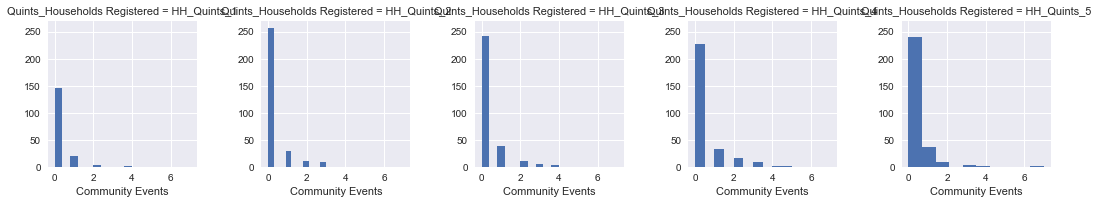

In [21]:
g = sns.FacetGrid(dataset, col="Quints_Households Registered")
g.map(plt.hist, "Community Events")


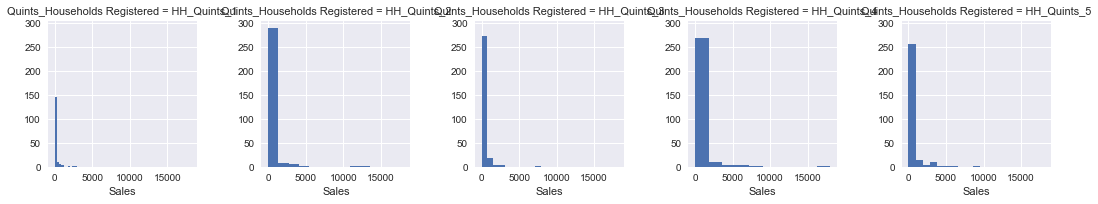

In [22]:
g = sns.FacetGrid(dataset, col="Quints_Households Registered")
g.map(plt.hist, "Sales")



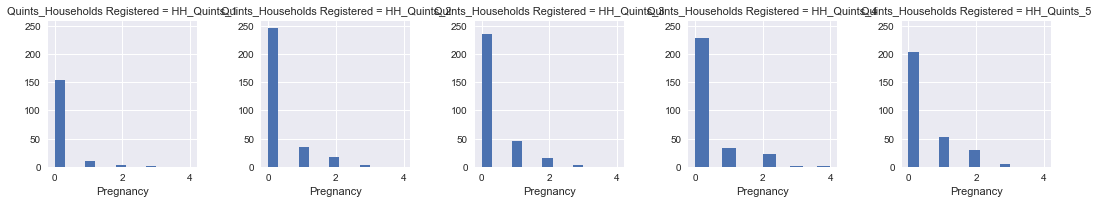

In [23]:
g = sns.FacetGrid(dataset, col="Quints_Households Registered")
g.map(plt.hist, "Pregnancy")
